# Documentation: Microphone Network Simulation for Animal Vocalization Detection

## Overview
This Python script simulates a network of microphones designed to detect animal vocalizations and analyze interactions between microphones. The simulation includes generating synthetic audio data, preprocessing that data, training a machine learning model to recognize vocalizations, and visualizing the interactions between microphones over time using an animation.

## Requirements
- Python 3.7 or higher
- Matplotlib
- NumPy
- Scikit-learn

## Installation
Ensure that Python and the required packages are installed. You can install the necessary libraries using pip:

```bash
pip install numpy matplotlib scikit-learn


## Script Structure

### The script is structured into several functions, each handling specific aspects of the simulation:

**1. simulate_audio_data(num_samples, grid_size)**

*Generates synthetic audio data representing MFCC (Mel-frequency cepstral coefficients) features and random labels indicating the presence of vocalizations.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.animation as animation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Simulate audio data collection with random MFCC features and binary labels.
def simulate_audio_data(num_samples, grid_size):
    audio_data = []
    for _ in range(num_samples):
        mic_id = random.randint(0, grid_size**2 - 1)
        features = np.random.rand(13)  # Simulate MFCC features
        label = random.randint(0, 1)  # Simulate binary label for vocalization detection
        audio_data.append((mic_id, features, label))
    return audio_data

**2. preprocess_data(audio_data)**

*Scales the feature data using standardization.*

In [2]:
# Simulate audio data collection with random MFCC features and binary labels.
def preprocess_data(audio_data):
    X = np.array([sample[1] for sample in audio_data])
    y = np.array([sample[2] for sample in audio_data])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

**3. train_model(X, y)**

*Trains a neural network model to predict the presence of vocalizations based on the features.*

In [3]:
# Train a machine learning model to predict animal vocalizations.
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"Model Accuracy: {accuracy}")
    return model

**4. find_neighbors(vocalization, mic_positions, radius)**

*Finds neighboring microphones within a specified radius based on Euclidean distance.*

In [4]:
#Find neighboring microphones based on Euclidean distance.
def find_neighbors(vocalization, mic_positions, radius):
    neighbors = []
    for mic in mic_positions:
        if np.linalg.norm(np.array(vocalization) - np.array(mic)) <= radius:
            neighbors.append(mic)
    return neighbors

**5. update_plot(frame, mic_positions, vocalizations_over_time, all_neighbors_over_time, scatter_mics, scatter_vocalizations, scatter_neighbors, lines)**

*Updates the plot for each frame in the animation to show the current state of vocalizations and their effects on neighboring microphones.*

In [5]:
# Update the plot for each frame in the animation.
def update_plot(frame, mic_positions, vocalizations_over_time, all_neighbors_over_time, scatter_mics, scatter_vocalizations, scatter_neighbors, lines):
    scatter_mics.set_offsets(mic_positions)
    current_vocalizations = vocalizations_over_time[frame]
    current_neighbors = all_neighbors_over_time[frame]
    
    scatter_vocalizations.set_offsets(current_vocalizations if current_vocalizations else [])
    scatter_neighbors.set_offsets(current_neighbors if current_neighbors else [])
    
    for line in lines:
        line.remove()
    lines.clear()
    
    for vocalization in current_vocalizations:
        for neighbor in current_neighbors:
            line = plt.Line2D([vocalization[0], neighbor[0]], [vocalization[1], neighbor[1]], color='gray', linestyle='--')
            ax.add_line(line)
            lines.append(line)
    
    return [scatter_mics, scatter_vocalizations, scatter_neighbors] + lines


**6. animate_simulation(mic_positions, vocalizations_over_time, all_neighbors_over_time, num_time_steps)**

*Creates and runs an animation showing how vocalizations at certain microphones influence their neighbors over time.*

Model Accuracy: 0.4


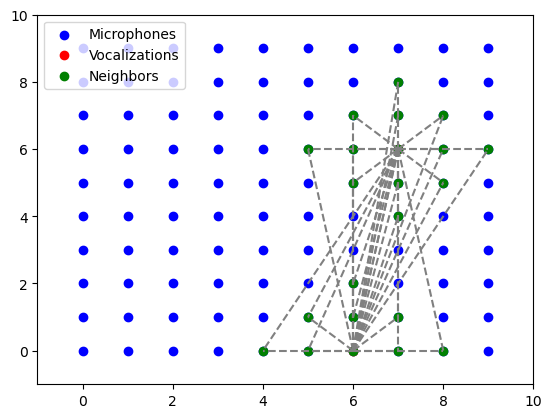

In [6]:
# Create and animate the simulation of microphone interactions.
def animate_simulation(mic_positions, vocalizations_over_time, all_neighbors_over_time, num_time_steps):
    global ax
    fig, ax = plt.subplots()
    ax.set_xlim(-1, grid_size)
    ax.set_ylim(-1, grid_size)
    scatter_mics = ax.scatter([], [], c='blue', label='Microphones')
    scatter_vocalizations = ax.scatter([], [], c='red', label='Vocalizations')
    scatter_neighbors = ax.scatter([], [], c='green', label='Neighbors')
    ax.legend()
    lines = []
    ani = animation.FuncAnimation(fig, update_plot, frames=num_time_steps, fargs=(mic_positions, vocalizations_over_time, all_neighbors_over_time, scatter_mics, scatter_vocalizations, scatter_neighbors, lines), blit=True)
    plt.show()

# Simulate vocalization events over time.
def simulate_vocalizations_over_time(num_events, mic_positions, num_time_steps):
    vocalizations = {t: [] for t in range(num_time_steps)}
    for _ in range(num_events):
        t = random.randint(0, num_time_steps-1)
        vocalization = random.choice(mic_positions)
        vocalizations[t].append(vocalization)
    return vocalizations

# Handle vocalizations and find neighbors.
def handle_vocalizations(vocalizations_over_time, mic_positions, radius):
    all_neighbors = {t: [] for t in vocalizations_over_time}
    for t, vocalizations in vocalizations_over_time.items():
        for vocalization in vocalizations:
            neighbors = find_neighbors(vocalization, mic_positions, radius)
            all_neighbors[t].extend(neighbors)
    return all_neighbors

if __name__ == "__main__":
    grid_size = 10
    num_samples = 100
    num_events = 20
    num_time_steps = 10
    radius = 2

    audio_data = simulate_audio_data(num_samples, grid_size)
    X, y = preprocess_data(audio_data)
    model = train_model(X, y)
    mic_positions = [(i, j) for i in range(grid_size) for j in range(grid_size)]
    vocalizations_over_time = simulate_vocalizations_over_time(num_events, mic_positions, num_time_steps)
    all_neighbors_over_time = handle_vocalizations(vocalizations_over_time, mic_positions, radius)
    animate_simulation(mic_positions, vocalizations_over_time, all_neighbors_over_time, num_time_steps)

## Conclusion

*This script provides a foundational approach to simulating a microphone network for detecting animal vocalizations. It can be adapted and expanded based on specific research needs or integrated with real sensor data for practical applications in bioacoustics monitoring.*